<a href="https://colab.research.google.com/github/samisarda/Netflix-Title-Analysis/blob/main/Netflix_Title_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Basic overview
df.shape
df.columns
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert date_added to datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Specified', inplace=True)
df['country'].fillna('Not Specified', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Split duration into numeric and units
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')


/tmp/ipython-input-10-2012336962.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-10-2012336962.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Specified,Not Specified,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


In [12]:
# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_type,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,2021.0,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Specified,Not Specified,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021.0,September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons,2021.0,September


In [13]:
# Total titles
total_titles = df.shape[0]

# Movies vs TV Shows
type_counts = df['type'].value_counts()

# Top 10 countries
top_countries = df['country'].value_counts().head(10)

# Top genres (listed_in)
from collections import Counter
genre_counts = Counter()
df['listed_in'].dropna().apply(lambda x: genre_counts.update([genre.strip() for genre in x.split(',')]))
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])


In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_type,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,2021.0,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Specified,Not Specified,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021.0,September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons,2021.0,September


In [15]:
# Save to CSV
df.to_csv('netflix_cleaned.csv', index=False)


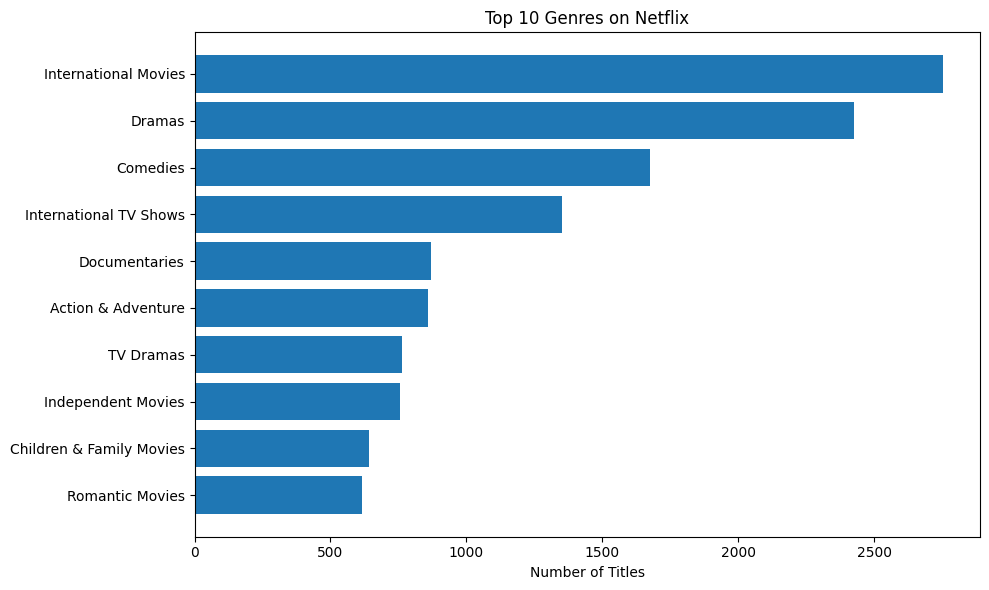

In [16]:
import matplotlib.pyplot as plt

# Bar chart for top genres
plt.figure(figsize=(10,6))
plt.barh(list(top_genres.keys()), list(top_genres.values()))
plt.xlabel('Number of Titles')
plt.title('Top 10 Genres on Netflix')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
